### First, let's load data, transform relevant columns to 'category' dtype and show basic info.

In [278]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(pd.read_csv("data/skychallenge_car_data.csv"))
df

,Unnamed: 0,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,coupe,red,43.477500,-96.704100,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,NaN,44.761200,-96.690700,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,NaN,44.141500,-103.205200,46093.0,Meade,46.0,SD,South Dakota,38.0
3,3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,sedan,grey,43.284500,-95.593000,19143.0,Osceola,19.0,IA,Iowa,47.0
4,4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,NaN,43.026100,-94.406400,19109.0,Kossuth,19.0,IA,Iowa,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723060,1723060,marshall,8450,2005.0,NaN,NICE,like new,8 cylinders,gas,162000.0,...,NaN,NaN,43.544168,-96.763372,46099.0,Minnehaha,46.0,SD,South Dakota,38.0
1723061,1723061,marshall,6000,2005.0,chevy,avalanche,good,8 cylinders,gas,NaN,...,NaN,NaN,43.345100,-96.882100,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1723062,1723062,marshall,1500,2007.0,volkswagen,jetta sedan,NaN,NaN,gas,0.0,...,NaN,NaN,41.622572,-87.632656,17031.0,Cook,17.0,IL,Illinois,48.0
1723063,1723063,marshall,4788,2009.0,toyota,camry,good,4 cylinders,gas,210682.0,...,sedan,red,43.388900,-95.136900,19059.0,Dickinson,19.0,IA,Iowa,47.0


In [279]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 25 columns):
 #   Column        Dtype   
---  ------        -----   
 0   city          category
 1   manufacturer  category
 2   make          category
 3   condition     category
 4   cylinders     category
 5   fuel          category
 6   title_status  category
 7   transmission  category
 8   vin           category
 9   drive         category
 10  size          category
 11  type          category
 12  paint_color   category
 13  county_name   category
 14  state_code    category
 15  state_name    category
 16  Unnamed: 0    int64   
 17  price         int64   
 18  year          float64 
 19  odometer      float64 
 20  lat           float64 
 21  long          float64 
 22  county_fips   float64 
 23  state_fips    float64 
 24  weather       float64 
dtypes: category(16), float64(7), int64(2)
memory usage: 176.1 MB


In [280]:
df_cat.count()

city            1723065
manufacturer    1586651
make            1653366
condition       1022275
cylinders       1031774
fuel            1712698
title_status    1720511
transmission    1714043
vin              604850
drive           1061181
size             599098
type            1020134
paint_color     1027415
county_name     1664232
state_code      1664232
state_name      1723065
Unnamed: 0      1723065
price           1723065
year            1716750
odometer        1159011
lat             1723065
long            1723065
county_fips     1664232
state_fips      1664232
weather         1663637
dtype: int64

### Next, I suspect 'manufacturer' column of having different values, but corresponding to the same manufacturer

In [281]:
sorted(df_cat["manufacturer"].dropna().unique())

['acura',
 'alfa-romeo',
 'aston-martin',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'datsun',
 'dodge',
 'ferrari',
 'fiat',
 'ford',
 'harley',
 'hennessey',
 'honda',
 'hyundai',
 'infiniti',
 'jaguar',
 'jeep',
 'kia',
 'land rover',
 'lexus',
 'lincoln',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'morgan',
 'nissan',
 'noble',
 'pontiac',
 'porche',
 'ram',
 'rover',
 'saturn',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

### Let's fix this and see unique values in 'manufacturers' once again

In [282]:
equivalents = {
    "volkswagen": ["vw"],
    "alfa-romeo": ["alfa"],
    "mercedes-benz": ["mercedes", "mercedesbenz"],
    "land rover": ["landrover"],
    "infiniti": ["infinity"],
    "chevrolet": ["chevy", "chev"],
    "aston-martin": ["aston"],
    "dodge": ["gmc"],
    "harley": ["harley-davidson"]
}

for (key, values) in equivalents.items():
    for eq in values:
        df_cat.replace(eq, key, inplace = True)
sorted(df_cat['manufacturer'].astype('str').unique())

['acura',
 'alfa-romeo',
 'aston-martin',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'datsun',
 'dodge',
 'ferrari',
 'fiat',
 'ford',
 'harley',
 'hennessey',
 'honda',
 'hyundai',
 'infiniti',
 'jaguar',
 'jeep',
 'kia',
 'land rover',
 'lexus',
 'lincoln',
 'mazda',
 'mercedes-benz',
 'mercury',
 'mini',
 'mitsubishi',
 'morgan',
 'nan',
 'nissan',
 'noble',
 'pontiac',
 'porche',
 'ram',
 'rover',
 'saturn',
 'subaru',
 'toyota',
 'volkswagen',
 'volvo']

### Now I'm checking if there are any columns that can be fixed the same way
### Spoiler alert: There's no such a column

In [283]:
df_cat.columns

Index(['city', 'manufacturer', 'make', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'vin', 'drive', 'size', 'type',
       'paint_color', 'county_name', 'state_code', 'state_name', 'Unnamed: 0',
       'price', 'year', 'odometer', 'lat', 'long', 'county_fips', 'state_fips',
       'weather'],
      dtype='object')

In [284]:
len((df_cat["manufacturer"].astype('str')+ " " + df_cat["make"].astype('str')).unique()) #pretty big to fix it by hand

111746

In [285]:
df_cat['condition'].unique()

[good, NaN, like new, excellent, new, fair, salvage]
Categories (6, object): [excellent < fair < good < like new < new < salvage]

In [286]:
df_cat.nunique()

city                470
manufacturer         42
make             107445
condition             6
cylinders             8
fuel                  5
title_status          6
transmission          3
vin              316207
drive                 3
size                  4
type                 13
paint_color          12
county_name        1834
state_code           51
state_name           52
Unnamed: 0      1723065
price             30349
year                126
odometer         172208
lat              275441
long             271604
county_fips        3111
state_fips           51
weather              26
dtype: int64

### Now, I'm dropping every data that is irrelevant: state and county things - because we already have lat and long, vin

In [287]:
df3 = df_cat.drop(columns=['county_fips', 'county_name', 'state_fips', 'state_code', 'state_name', 'vin', 'city'])
df3

,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,Unnamed: 0,price,year,odometer,lat,long,weather
0,dodge,challenger se,good,6 cylinders,gas,clean,automatic,rwd,NaN,coupe,red,0,11900,2010.0,43600.0,43.477500,-96.704100,38.0
1,NaN,fleetwood,NaN,NaN,gas,clean,other,NaN,NaN,NaN,NaN,1,1515,1999.0,NaN,44.761200,-96.690700,38.0
2,ford,f-150,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,NaN,2,17550,2008.0,NaN,44.141500,-103.205200,38.0
3,ford,taurus,good,6 cylinders,gas,clean,automatic,fwd,full-size,sedan,grey,3,2800,2004.0,168591.0,43.284500,-95.593000,47.0
4,NaN,2001 Grand Prix,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,NaN,4,400,2001.0,217000.0,43.026100,-94.406400,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723060,NaN,NICE,like new,8 cylinders,gas,clean,automatic,4wd,NaN,NaN,NaN,1723060,8450,2005.0,162000.0,43.544168,-96.763372,38.0
1723061,chevrolet,avalanche,good,8 cylinders,gas,clean,automatic,4wd,NaN,NaN,NaN,1723061,6000,2005.0,NaN,43.345100,-96.882100,38.0
1723062,volkswagen,jetta sedan,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,NaN,1723062,1500,2007.0,0.0,41.622572,-87.632656,48.0
1723063,toyota,camry,good,4 cylinders,gas,clean,automatic,fwd,mid-size,sedan,red,1723063,4788,2009.0,210682.0,43.388900,-95.136900,47.0


### Now, let's see JointPlots against price from randomly selected samples

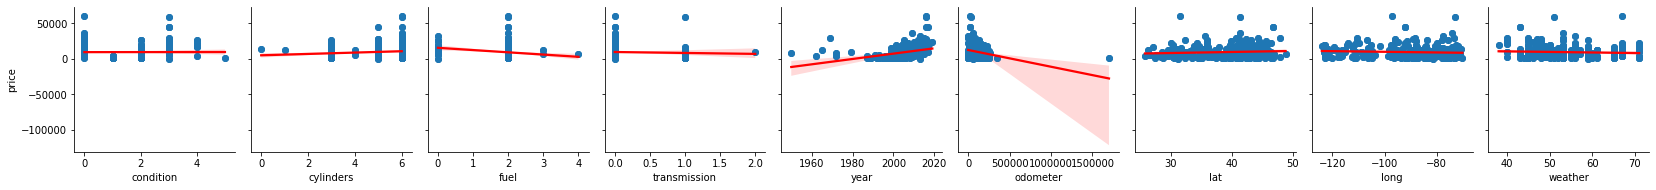

In [288]:
data = df3.dropna().sample(300).apply(lambda x: x.cat.codes if hasattr(x, 'cat') else x) #Use category code if column is categorical
g = sns.pairplot(data = data, 
                 y_vars = ['price'], 
                 x_vars = ['condition', 'cylinders', 'fuel', 'transmission', 'year', 'odometer', 'lat', 'long', 'weather'], 
                 kind = 'reg', 
                 plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.9}})
g.map(plt.scatter)

### Now, we can see that year and odometer might have the biggest influence on price, as we'd suggest.
### Let's filter the data and see how price looks on georaphical map.

In [289]:
def filter_outliers(df, column, left=0.005, right = 0.995, mode = 'quantiles'):
    if(mode=='quantiles'):
        q_low = df3[column].quantile(left)
        q_hi = df3[column].quantile(right)
        return df[~((df[column]<q_low)|(df[column]>q_hi))]
    elif(mode=='std'):
        return df.where(~(df[column] > df[column].mean() + 3*df[column].std()))

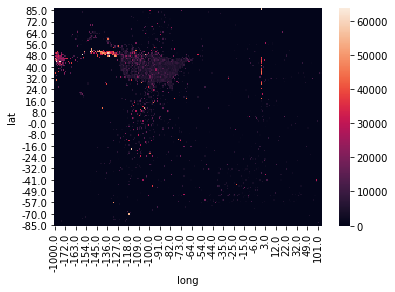

In [290]:
fp = filter_outliers(df3, "price")
fo = filter_outliers(fp, "odometer", left = 0, right=0.999) #Odometer from 0-1600000. 
fy = filter_outliers(fp, column='odometer', mode='std')

lat_long_price = fy[['lat', 'long', 'price']].dropna()[['lat', 'long', 'price']].apply(lambda x: np.round(x, 0)).groupby(['lat', 'long'])['price'].median().unstack().fillna(0)
ax = sns.heatmap(lat_long_price)
ax.invert_yaxis()

In [291]:
### Let's also check how big part of our data comes from USA
lat_bounds = (24, 56)
long_bounds = (-154, -60)
df_usa = fy[fy['long'].between(*long_bounds)][fy['lat'].between(*lat_bounds)]
100 * len(df_usa)/len(fy)

98.97141363986587

### We can see that it's about 99%! There's no need to analyze the data outside of USA.
### Let's see how our map looks now.

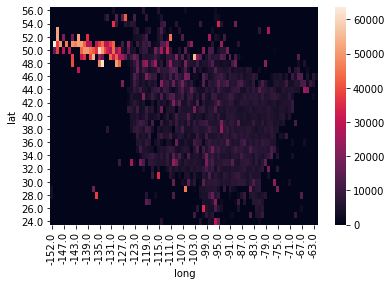

In [292]:
lat_long_price = df_usa[['lat', 'long', 'price']].dropna()[['lat', 'long', 'price']].apply(lambda x: np.round(x, 0)).groupby(['lat', 'long'])['price'].median().unstack().fillna(0)
ax = sns.heatmap(lat_long_price)
ax.invert_yaxis()

### We can see that many median of price is really hight between long -152 and -127.
### Let's check how much of our data points it contains.

In [293]:
100 * len(df_usa[df_usa['long'].between(-152, -127)])/len(df_usa)

0.039779497823619475

### 4% Of data would be a relevant lose, so let's use the data.

In [294]:
df_usa.count()

manufacturer    1565082
make            1628251
condition       1006991
cylinders       1016379
fuel            1686610
title_status    1694317
transmission    1687926
drive           1044346
size             591342
type            1003792
paint_color     1010546
Unnamed: 0      1696854
price           1696854
year            1690648
odometer        1140643
lat             1696854
long            1696854
weather         1640687
dtype: int64

### Continuing data cleaning - let's see if drive, size, condition, title_status, type and paint_color have impact on price

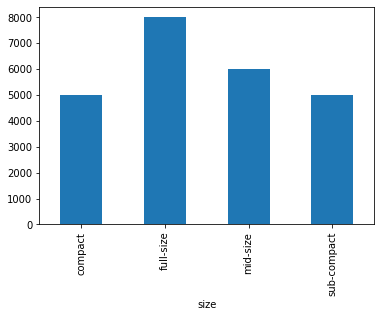

In [295]:
def plot_impact(df, column):
    data = df.dropna().apply(lambda x: x.astype('str') if hasattr(x, 'cat') else x).groupby(column)['price'].median().fillna(0)
    return data.plot(kind='bar')

plot_impact(df_usa, 'size')

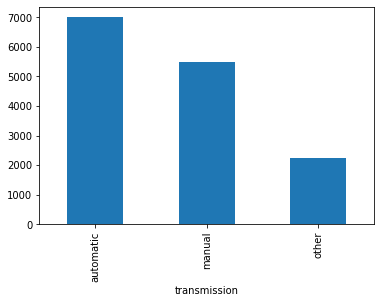

In [296]:
plot_impact(df_usa, 'transmission')

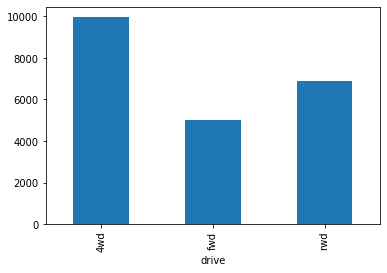

In [297]:
plot_impact(df_usa, 'drive')

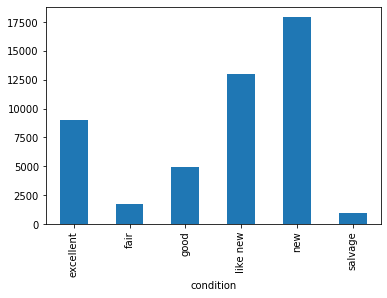

In [298]:
plot_impact(df_usa, 'condition')

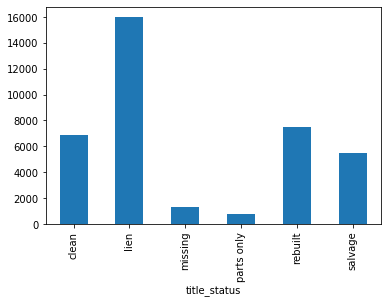

In [299]:
plot_impact(df_usa, 'title_status')

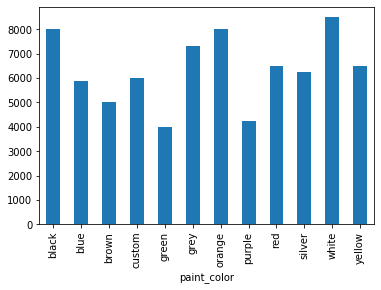

In [300]:
plot_impact(df_usa, 'paint_color')

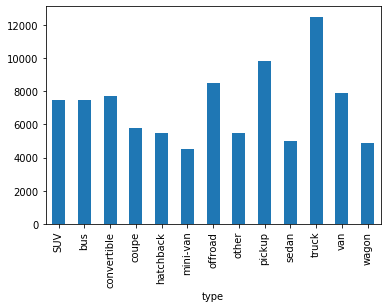

In [301]:
plot_impact(df_usa, 'type')

In [302]:
def title_mask(title):
    return (df_usa['title_status']==title)
mask = title_mask('missing') | title_mask('parts only') 
100 * len(df_usa[mask])/len(df_usa)

0.9426856995357291

### Parts only and missing are only 1% of data, but can be problematic for our model.
### Let's also drop these categories, since we want to predict prices 

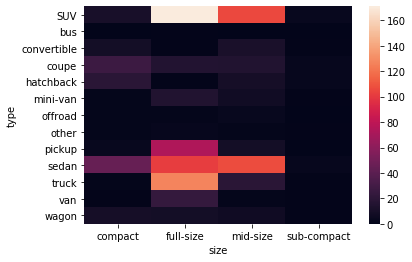

In [303]:
sns.heatmap(df_usa.dropna().sample(1000)[['type','size']].groupby(['type', 'size']).size().unstack())

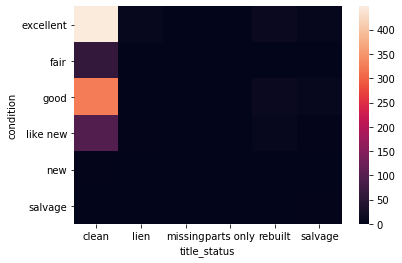

In [304]:
sns.heatmap(df_usa.dropna().sample(1000)[['condition','title_status']].groupby(['condition','title_status']).size().unstack())

### Checking if we can infer condition from odometer and year values.

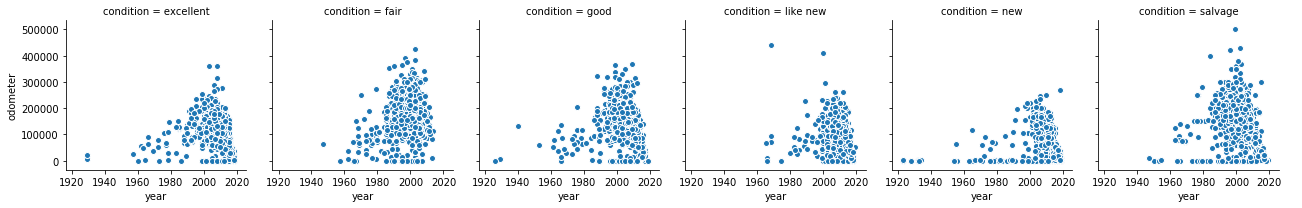

In [305]:
sample = df_usa.dropna().groupby('condition').apply(lambda x: x.sample(1000))
g = sns.FacetGrid(sample, col='condition')
g.map(plt.scatter, "year", "odometer", edgecolor="w").add_legend()

### Let's create some percentage heatmaps and check if we can find anything interesting

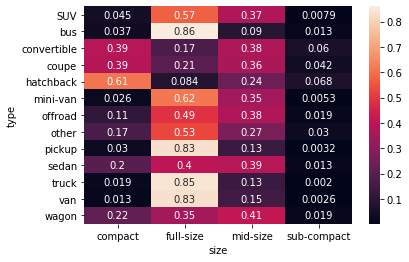

In [306]:
def percentage_heatmap(df, col1, col2, sample_size=-1):
    sample = df.dropna()[[col1, col2]]
    if(sample_size > -1):
        sample = sample.groupby([col1, col2]).apply(lambda x: x.sample(sample_size))
    col1_col2 = sample.groupby([col1, col2]).size()
    col1_ = sample.groupby([col1]).size()
    percentages = col1_col2.div(col1_, level=col1).unstack()
    sns.heatmap(percentages, annot=True)

percentage_heatmap(df_usa, 'type', 'size')

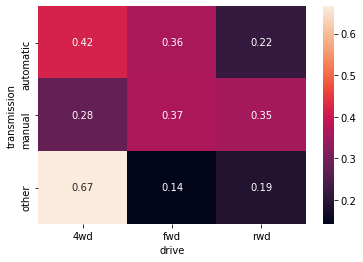

In [307]:
percentage_heatmap(df_usa, 'transmission', 'drive')

### Seems like condition is linked to odometer and year. We can drop condition to avoid overfitting.
### Also type seems not so relevant, as well as weather, size, paint_color, transmission and drive. Fuel is most often linked to given make.
### It would also be suitable if we dropped duplicates to avoid overfitting.

In [308]:
dropped = df_usa[['price', 'manufacturer', 'make', 'odometer', 'year', 'cylinders', 'lat', 'long']].drop_duplicates()

### Time for infering. First, let's infer unknown manufacturers from known makes. Most often makes' names are different for every manufacturer.

In [309]:
most_common_man = dropped[['make', 'manufacturer']].groupby('make')['manufacturer'].agg(pd.Series.mode).dropna()

In [310]:
d = most_common_man.to_dict()
def most_common_man_for_make(make):
    if(make in d.keys()):
        try:
            return d[make][0]
        except:
            return None
    else:
        return None

In [311]:
def replace_man(x):
    x['manufacturer'] = most_common_man_for_make(x['make'])
    return x
mask = (dropped['manufacturer'].isna()) & (~dropped['make'].isna())
predicted = dropped[['make', 'manufacturer']][mask].apply(replace_man, axis=1)

In [312]:
predicted.dropna()

,make,manufacturer
1,fleetwood,cadillac
32,model,ford
33,model,ford
34,model,ford
35,model,ford
...,...,...
1722327,sahara,jeep
1722474,nascar,dodge
1722535,corolla ce,toyota
1722963,1998,chevrolet


In [313]:
dropped[['manufacturer', 'make']][mask]['manufacturer'].fillna(predicted['manufacturer'], inplace=True)

### Let's also fillna of odometer by mean

In [318]:
dropped['odometer'] = dropped['odometer'].fillna(dropped['odometer'].mean())

### And predict cylinders to most common number for given manufacturer. Set 'other' to rounded mean.

In [314]:
cylinders = dropped['cylinders'].dropna().astype('str')
def parse_cylinders(string):
    return int(string.split(" ")[0])
cylinders_dict = dropped[['manufacturer', 'cylinders']].groupby('manufacturer').agg(lambda x:x.value_counts().index[0]).to_dict()['cylinders']
mean_cylinders = int(cylinders[~cylinders.str.contains('other')].apply(parse_cylinders).mean())
dropped['cylinders'] = dropped['cylinders'].astype('str').apply(lambda x: mean_cylinders if(x=='other' or x=='nan') else parse_cylinders(x))
nona = dropped.dropna().drop_duplicates().drop(columns = ['lat', 'long']) #Decided to drop lat and log due to better final score

### Let's encode end scale our data from -1 to 1

In [315]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
X = nona.drop(columns='price')
encoder = OrdinalEncoder().fit(X[['manufacturer', 'make']])
y = nona['price'].to_numpy()
X[['manufacturer', 'make']] = encoder.transform(X[['manufacturer', 'make']])
scaler = MinMaxScaler((-1, 1)).fit(X)
X_scaled = scaler.transform(X)

### Now I'm using SGDRegressor beacause of large dataset

In [325]:
from sklearn import linear_model
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_scaled, y)
clf.score(X_scaled, y)

0.2972341606767336

In [327]:
def predict(manufacturer, make, odometer, year, cylinders):
    X = np.array([manufacturer, make, odometer, year, cylinders]).reshape(1, 5)
    df = pd.DataFrame
    X[:, :2] = encoder.transform(X[:, :2])
    X_scaled = scaler.transform(X)
    return clf.predict(X_scaled)
predict(*nona.drop(columns='price').to_numpy()[0])

array([15519.31332841])

### Now, by doing the same operations I've done on the DataFrame, we would get prediction for any provided data.